# MATH 210 Introduction to Mathematical Computing

## December 2, 2020

* Interpolation
* Regression
* Eigenvalues

## Interpolation

Suppose we have $N+1$ data points $(x_0,y_0),\dots,(x_N,y_N)$ ($x_i \not= x_j$ for $i \not= j$). There exists a unique polynomial of degree $N$

$$
p(x) = c_0 + c_1 x + c_2 x^2 + \cdots + c_Nx^N
$$

which interpolates the points $p(x_i) =  y_i$. Each point defines an equation and we get a linear system

$$
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^N \\
1 & x_1 & x_1^2 & \cdots & x_1^N \\
 & \vdots &  & \cdots & \vdots \\
1 & x_N & x_N^2 & \cdots & x_N^N \\
\end{bmatrix}
\begin{bmatrix}
c_0 \\ c_1 \\ \vdots \\ c_N
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_N
\end{bmatrix}
$$

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
x = np.array([-1,0,1])
y = np.array([1,0,1])
X = np.vander(x,increasing=True)
c = la.solve(X,y)
print(c)

[0. 0. 1.]


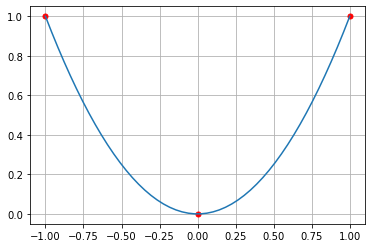

In [3]:
x = np.array([-1,0,1])
y = np.array([1,0,1])
X = np.vander(x,increasing=True)
c = la.solve(X,y)

plt.plot(x,y,'r.',ms=10); plt.grid(True);
xs = np.linspace(-1,1,50)
ys = sum([c[n]*xs**n for n in range(0,len(c))])
# ys = c[0] + c[1]*xs + c[2]*xs**2 + c[3]*xs**3 + ....
plt.plot(xs,ys)
plt.show()

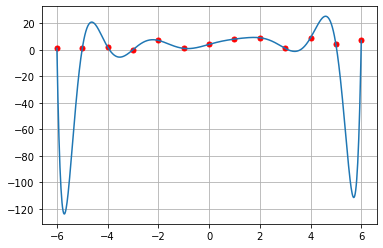

In [4]:
N = 6
x = np.arange(-N,N+1)
y = np.random.randint(0,10,x.shape)
X = np.vander(x,increasing=True)
c = la.solve(X,y)

plt.plot(x,y,'r.',ms=10); plt.grid(True);
xs = np.linspace(-N,N,100*N)
ys = sum([c[n]*xs**n for n in range(0,len(c))])
plt.plot(xs,ys)
plt.show()

In [5]:
N = 20
x = np.linspace(0,1,N)
X = np.vander(x,increasing=True)
la.det(X)

5.703210674074779e-106

## Polynomial regression

Suppose we have $N+1$ data points $(x_0,y_0),\dots,(x_N,y_N)$ ($x_i \not= x_j$ for $i \not= j$). We want to find the polynomial of degree $d$ ($d < N$) which best fits the data

$$
p(x) = c_0 + c_1 x + c_2 x^2 + \cdots + c_dx^d
$$

$$
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^d \\
1 & x_1 & x_1^2 & \cdots & x_1^d \\
 & \vdots &  & \cdots & \vdots \\
1 & x_N & x_N^2 & \cdots & x_N^d \\
\end{bmatrix}
\begin{bmatrix}
c_0 \\ c_1 \\ \vdots \\ c_N
\end{bmatrix}
\approx
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_N
\end{bmatrix}
$$

Coefficient vector $\mathbf{c}$ is the solution of normal equations

$$
X^T X \mathbf{c} = X^T \mathbf{y}
$$

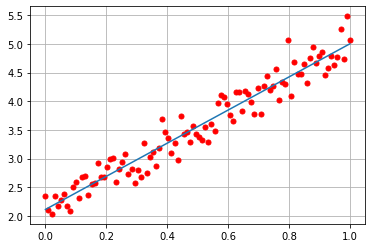

In [6]:
N = 100; d = 1;
x = np.linspace(0,1,N)
noise = 0.2*np.random.randn(N)
y = 3*x + 2 + noise
X = np.vander(x,N=d+1,increasing=True)
c = la.solve(X.T@X,X.T@y)

plt.plot(x,y,'r.',ms=10); plt.grid(True);
xs = np.linspace(0,1,100)
ys = sum([c[n]*xs**n for n in range(0,len(c))])
plt.plot(xs,ys)
plt.show()

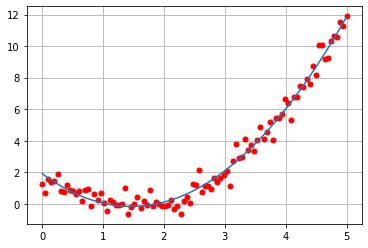

In [7]:
N = 100; d = 2;
x = np.linspace(0,5,N)
noise = 0.5*np.random.randn(N)
y = x**2 - 3*x + 2 + noise
X = np.vander(x,N=d+1,increasing=True)
c = la.solve(X.T@X,X.T@y)

plt.plot(x,y,'r.',ms=10); plt.grid(True);
xs = np.linspace(0,5,100)
ys = sum([c[n]*xs**n for n in range(0,len(c))])
plt.plot(xs,ys)
plt.show()

## Eigenvalues

In [8]:
M = np.array([[1,1],[1,-1]])

In [9]:
result = la.eig(M)

In [10]:
evals = result[0].real
evals

array([ 1.41421356, -1.41421356])

In [11]:
evecs = result[1].real
evecs

array([[ 0.92387953, -0.38268343],
       [ 0.38268343,  0.92387953]])

In [12]:
M@evecs[:,0].reshape(2,1)

array([[1.30656296],
       [0.5411961 ]])

In [13]:
evals[0]*evecs[:,0].reshape(2,1)

array([[1.30656296],
       [0.5411961 ]])